In [1]:
# Face landmarks Detection
# usage:
# python facelandmarkdetect.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/face1.jpg

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import os
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
# import urllib.request
# ...
# # Download the file from `url` and save it locally under `file_name`:
# url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
# file_name = 'face_detector.dat.bz2'
# urllib.request.urlretrieve(url, file_name)

In [3]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
face_detector_path = r'D:\Facial-Landmark-Detection\face_detector.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(face_detector_path)

In [4]:
# load the input image, resize it, and convert it to grayscale
image_path = r'D:\Facial-Landmark-Detection\Data\Training\14\14_3.jpg'
image = cv2.imread(image_path)
#image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', gray)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [5]:
# detect faces in the grayscale image
rects = detector(gray, 1)

cropped = []
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)

	RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	
	# Crop facial landmark
	cropped.append(RGB_img[y:y+h, x:x+h])

	cv2.rectangle(RGB_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
	print("Start:", end='')
	print(x, end=',')
	print(y)
	print("End:", end='')
	print(x + w, end=',')
	print(y + h)

	#show the face number
	cv2.putText(RGB_img, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)



	# #loop over the (x, y)-coordinates for the facial landmarks
	# #and draw them on the image
	# for (x, y) in shape:
	# 	cv2.circle(image, (x, y), 1, (0, 0, 255), -1)


Start:583,655
End:712,784
Start:-44,241
End:312,562
Start:855,669
End:984,798
Start:740,206
End:1061,527


Original Dimensions :  (129, 129, 3)
Resized Dimensions :  (150, 150, 3)
Original Dimensions :  (321, 0, 3)


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


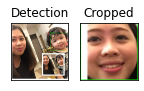

In [6]:
# show the output image with the face detections + facial landmarks

# Saving the image
plt.subplot(1,len(cropped)+1,1)
plt.imshow(RGB_img)
plt.xticks([])
plt.yticks([])
plt.title("Detection")

z = 0
for i in cropped:
	saved_file_name = os.path.join(r'D:\Facial-Landmark-Detection\similarity_test', str(z)+'.jpg')
	#i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
	print('Original Dimensions : ',i.shape)
	resized = cv2.resize(i, (150, 150))
	print('Resized Dimensions : ',resized.shape)
	plt.imsave(saved_file_name, resized)
	z = z + 1

	plt.subplot(1,len(cropped)+1,z+1)
	plt.imshow(resized)
	plt.xticks([])
	plt.yticks([])
	plt.title("Cropped")

plt.show()